# Working with complicated dataset

Your name:Yossef Eini

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [46]:
### Your code here . . .
import pandas as pd

# URL for the blast results CSV file
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
df = pd.read_csv(url, comment="#")

# Define the column names
column_names = [
    'query acc.ver.', 'subject acc.ver.', 'perc_identity', 'alignment_length', 'mismatches',
    'gap_openings', 'q.start', 'q.end', 's.start', 's.end', 'evalue', 'bit_score', 'perc positives',
    'bonds', 'publications', 'other_column_3'
]
df.columns = column_names
df.drop(columns=['query acc.ver.'], inplace=True)
df.drop(columns=['other_column_3'], inplace=True)
df.set_index('subject acc.ver.', inplace=True)

df['publications'] = pd.to_numeric(df['publications'], errors='coerce')
df = df.dropna(subset=['publications'])
df['bonds'] = df['bonds'].str.replace(',', '').astype(float)
data = df[['publications']]
print(data.head())
df.head()











                  publications
subject acc.ver.              
NP_904328.1                9.0
AGK29621.1                47.0
YP_220563.1               13.0
ACM24502.1                41.0
AHG32084.1                 3.0


,perc_identity,alignment_length,mismatches,gap_openings,q.start,q.end,s.start,s.end,evalue,bit_score,perc positives,bonds,publications
subject acc.ver.,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487.0,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947.0,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106.0,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319.0,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964.0,3.0


### Question 2
What is the average number of publications?

In [47]:
### Your code here . . .
average_publications = data.mean()
print(round(average_publications, 2))

publications    26.99
dtype: float64


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [45]:
over_15k = df[df['bonds'] > 15000]
over_15k_subjects = over_15k.index
print(over_15k_subjects)



Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_009453806.1', 'YP_007024956.1', 'ASM92364.1',
       'YP_006073044.1', 'ASM92494.1', 'ADG95699.1', 'YP_004891275.1',
       'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1', 'YP_009178854.1',
       'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1', 'ABX45285.1',
       'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver.')


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

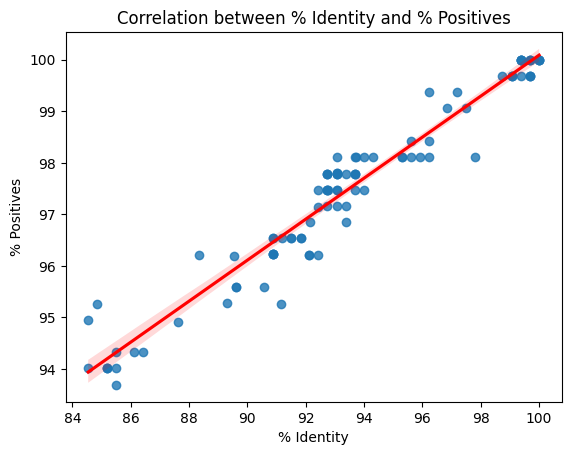

In [19]:
### Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt
df['perc_identity'] = df['perc_identity'].astype(float)
df['perc_positives'] = df['perc positives'].astype(float)
sns.regplot(x='perc_identity', y='perc_positives', data=df, scatter=True, line_kws={"color": "red"})
plt.title('Correlation between % Identity and % Positives')
plt.xlabel('% Identity')
plt.ylabel('% Positives')
plt.show()



### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [41]:
protein_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_df = pd.read_csv(protein_url)
protein_column_names = ['Protein', 'subject acc.ver', 'Source']
protein_df.columns = protein_column_names
df.columns = df.columns.str.strip()
protein_df.columns = protein_df.columns.str.strip()
protein_df.rename(columns={'subject acc.ver': 'subject acc.ver.'}, inplace=True)
together = pd.merge(df, protein_df[['subject acc.ver.', 'Protein', 'Source']], on='subject acc.ver.', how='left')
together.rename(columns={'Source': 'Protein source'}, inplace=True)
print(together.head())

  subject acc.ver.  perc_identity  alignment_length  mismatches  gap_openings  \
0      NP_904328.1        100.000               318           0             0   
1       AGK29621.1         99.686               318           1             0   
2      YP_220563.1         99.686               318           1             0   
3       ACM24502.1         99.686               318           1             0   
4       AHG32084.1         99.371               318           2             0   

   q.start  q.end  s.start  s.end  evalue  bit_score  perc positives    bonds  \
0        1    318        1    318       0        629          100.00   1487.0   
1        1    318        1    318       0        629          100.00  17947.0   
2        1    318        1    318       0        627          100.00  12106.0   
3        1    318        1    318       0        627           99.69   2319.0   
4        1    318        1    318       0        627          100.00  18964.0   

   publications  Protein P